1.数据获取

In [2]:
import pymysql
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
db = pymysql.connect(host="cdb-r2g8flnu.bj.tencentcdb.com", port=10209, user="dase2020", password="dase2020",
                     database="dase_intro_2020")
cursor = db.cursor()
sql = "SELECT * FROM SH_Grade"
cursor.execute(sql)
RawData = cursor.fetchall()
sql = "SELECT COLUMN_NAME from information_schema.COLUMNS where table_name = 'SH_Grade'"
cursor.execute(sql)
columns = cursor.fetchall()
columns = [i[0] for i in columns]
columns.insert(2, 'Class')
with open('./SH_Grade.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(columns)
    for da in RawData:
        temp = (da[1][0],)
        da = da[0:2] + temp + da[2:]
        writer.writerow(da)

2.数据预处理I

In [3]:
Data = pd.read_csv('./SH_Grade.csv')
print(f'before processed {Data.shape[0]} rows')
Data = Data.drop_duplicates(subset=['StuId'])

print(f'after processed {Data.shape[0]} rows')

before processed 252 rows
after processed 243 rows


3.数据预处理II

In [4]:
print(f'before processed II {Data.shape[0]} rows')
Data = Data.dropna(thresh=Data.shape[1]-12)
print(f'after processed II {Data.shape[0]} rows')
Data = Data.reset_index()

before processed II 243 rows
after processed II 189 rows


4.数据预处理III

In [5]:
Data['Sex'] = Data['Sex'].fillna(method='ffill')
for i in range(5, Data.shape[1]):
    Data.iloc[:, i] = Data.iloc[:, i].fillna(Data.iloc[:, i].median())
Data

,index,id,StuId,Class,Sex,CHI611,MATH611,ENG611,CHI612,MATH612,...,CHI912,MATH912,ENG912,PHY912,CHE912,CHI921,MATH921,ENG921,PHY921,CHE921
0,0,1,A01,A,F,75.0,83.0,95.0,77.0,95.0,...,130.0,134.0,136.5,88.0,94.0,120.0,137.0,140.0,79.0,57.0
1,1,2,A02,A,F,88.0,100.0,90.0,88.0,100.0,...,132.0,146.0,142.0,97.0,96.0,134.0,138.0,145.5,84.0,57.0
2,2,3,A03,A,F,85.0,97.0,91.0,87.0,96.0,...,132.0,146.0,144.5,96.0,95.0,134.0,145.0,146.0,86.0,57.0
3,3,4,A04,A,F,83.0,97.0,97.0,83.0,94.0,...,133.0,129.0,142.0,84.0,94.0,121.0,136.0,140.0,83.0,53.0
4,4,5,A05,A,F,81.0,89.0,94.0,84.0,89.0,...,127.0,137.0,136.0,87.0,92.0,124.0,140.0,128.0,79.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,237,238,G25,G,M,67.0,49.0,49.0,55.0,54.0,...,94.0,20.0,52.5,46.0,75.0,93.0,10.0,60.0,42.0,39.0
185,238,239,G26,G,M,41.0,43.0,57.0,51.0,63.0,...,69.0,54.0,65.0,57.0,74.0,54.0,68.0,74.0,41.0,42.0
186,239,240,G27,G,M,70.0,80.0,77.0,69.0,75.0,...,119.0,133.0,123.0,88.0,86.0,112.0,114.0,134.5,74.0,52.0
187,241,242,G29,G,M,59.0,12.0,62.0,57.0,9.0,...,89.0,10.0,58.0,30.0,25.0,78.0,26.0,77.5,29.0,9.0


5.数据预处理IV

In [6]:
for i in range(5, Data.shape[1]):
    Max = Data.iloc[:, i].max()
    if Max <= 60:
        Data.iloc[:, i] *= 100 / 60
    elif Max <= 90 and Data.columns[i][:3] == 'PHY':
        Data.iloc[:, i] *= 100 / 90
    elif 100 < Max <= 120:
        Data.iloc[:, i] *= 100 / 120
    elif 120 < Max <= 150:
        Data.iloc[:, i] *= 100 / 150
Data

,index,id,StuId,Class,Sex,CHI611,MATH611,ENG611,CHI612,MATH612,...,CHI912,MATH912,ENG912,PHY912,CHE912,CHI921,MATH921,ENG921,PHY921,CHE921
0,0,1,A01,A,F,75.0,83.0,95.0,77.0,95.0,...,86.666667,89.333333,91.000000,88.0,94.0,80.000000,91.333333,93.333333,87.777778,95.000000
1,1,2,A02,A,F,88.0,100.0,90.0,88.0,100.0,...,88.000000,97.333333,94.666667,97.0,96.0,89.333333,92.000000,97.000000,93.333333,95.000000
2,2,3,A03,A,F,85.0,97.0,91.0,87.0,96.0,...,88.000000,97.333333,96.333333,96.0,95.0,89.333333,96.666667,97.333333,95.555556,95.000000
3,3,4,A04,A,F,83.0,97.0,97.0,83.0,94.0,...,88.666667,86.000000,94.666667,84.0,94.0,80.666667,90.666667,93.333333,92.222222,88.333333
4,4,5,A05,A,F,81.0,89.0,94.0,84.0,89.0,...,84.666667,91.333333,90.666667,87.0,92.0,82.666667,93.333333,85.333333,87.777778,90.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,237,238,G25,G,M,67.0,49.0,49.0,55.0,54.0,...,62.666667,13.333333,35.000000,46.0,75.0,62.000000,6.666667,40.000000,46.666667,65.000000
185,238,239,G26,G,M,41.0,43.0,57.0,51.0,63.0,...,46.000000,36.000000,43.333333,57.0,74.0,36.000000,45.333333,49.333333,45.555556,70.000000
186,239,240,G27,G,M,70.0,80.0,77.0,69.0,75.0,...,79.333333,88.666667,82.000000,88.0,86.0,74.666667,76.000000,89.666667,82.222222,86.666667
187,241,242,G29,G,M,59.0,12.0,62.0,57.0,9.0,...,59.333333,6.666667,38.666667,30.0,25.0,52.000000,17.333333,51.666667,32.222222,15.000000


6.数据分析与可视化I

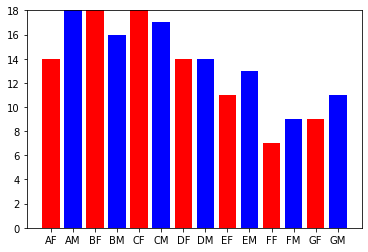

In [7]:
FMNum = np.zeros(14, int)
for i in range(Data.shape[0]):
    temp = Data.iloc[i, :]
    if temp[4] == 'F':
        FMNum[2*(ord(temp[3]) - ord('A'))] += 1
    else:
        FMNum[2*(ord(temp[3]) - ord('A')) + 1] += 1
xLabel = ['AF', 'AM', 'BF', 'BM', 'CF', 'CM', 'DF', 'DM', 'EF', 'EM', 'FF', 'FM', 'GF', 'GM']
color = []
for i in range(7):
    color.append('red')
    color.append('blue')
x = np.arange(14)
plt.xticks(x, xLabel)
plt.bar(x, FMNum, color=color)
plt.ylim(0, 18)
plt.show()

7.数据分析与可视化II

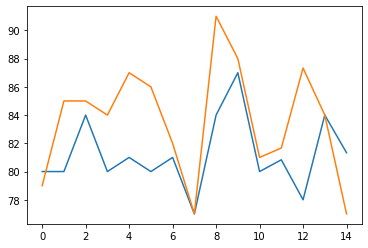

In [8]:
S1 = Data.iloc[12]
S2 = Data.iloc[14]
score1 = []
score2 = []
for i in range(5, Data.shape[1]):
    if Data.columns[i][:3] == 'CHI':
        score1.append(S1[i])
        score2.append(S2[i])
plt.plot(np.arange(15), score1, np.arange(15), score2)
plt.show()

8.数据分析III

In [9]:
record = []
for i in range(Data.shape[0]):
    temp = Data.iloc[i]
    if temp['CHI721'] < 60 or temp['ENG721'] < 60:
        record.append([temp['StuId'], temp['Class'], temp['CHI721'], temp['ENG721']])
record

[['B17', 'B', 42.0, 30.0],
 ['D02', 'D', 75.0, 51.0],
 ['D13', 'D', 73.0, 54.0],
 ['D29', 'D', 76.0, 54.0],
 ['E14', 'E', 64.0, 47.0],
 ['E22', 'E', 65.0, 46.0],
 ['E23', 'E', 68.0, 54.0],
 ['E26', 'E', 53.0, 26.0],
 ['E28', 'E', 48.0, 36.0],
 ['E29', 'E', 70.0, 53.0],
 ['E30', 'E', 48.0, 34.0],
 ['E31', 'E', 76.0, 56.0],
 ['F09', 'F', 67.0, 36.0],
 ['F10', 'F', 61.0, 37.0],
 ['F11', 'F', 50.0, 34.0],
 ['F18', 'F', 58.0, 53.0],
 ['F20', 'F', 56.0, 82.0],
 ['F22', 'F', 56.0, 79.0],
 ['F27', 'F', 72.0, 53.0],
 ['G08', 'G', 63.0, 53.0],
 ['G13', 'G', 67.0, 41.0],
 ['G14', 'G', 48.0, 52.0],
 ['G25', 'G', 77.0, 44.0],
 ['G26', 'G', 35.0, 76.0],
 ['G29', 'G', 59.0, 60.0],
 ['G30', 'G', 57.0, 82.0]]

9.数据分析IV

In [10]:
Data_ClassA = Data.iloc[:32]
Data_ClassC = Data.iloc[66:101]
print(f"the mean of CHI622 ClassA:{round(Data_ClassA['CHI622'].mean(), 2)}    the mean of CHI622 ClassC:{round(Data_ClassC['CHI622'].mean(), 2)}")
print(f"the var of CHI622 ClassA:{round(Data_ClassA['CHI622'].var(), 2)}    the var of CHI622 ClassC:{round(Data_ClassC['CHI622'].var(), 2)}")
print(f"the mean of MATH622 ClassA:{round(Data_ClassA['MATH622'].mean(), 2)}    the mean of MATH622 ClassC:{round(Data_ClassC['MATH622'].mean(), 2)}")
print(f"the var of MATH622 ClassA:{round(Data_ClassA['MATH622'].var(), 2)}    the var of MATH622 ClassC:{round(Data_ClassC['MATH622'].var(), 2)}")
print(f"the mean of ENG622 ClassA:{round(Data_ClassA['ENG622'].mean(), 2)}    the mean of ENG622 ClassC:{round(Data_ClassC['ENG622'].mean(), 2)}")
print(f"the var of ENG622 ClassA:{round(Data_ClassA['ENG622'].var(), 2)}    the var of ENG622 ClassC:{round(Data_ClassC['ENG622'].var(), 2)}")

the mean of CHI622 ClassA:81.41    the mean of CHI622 ClassC:76.97
the var of CHI622 ClassA:28.7    the var of CHI622 ClassC:26.26
the mean of MATH622 ClassA:90.75    the mean of MATH622 ClassC:89.2
the var of MATH622 ClassA:19.94    the var of MATH622 ClassC:71.69
the mean of ENG622 ClassA:89.97    the mean of ENG622 ClassC:91.26
the var of ENG622 ClassA:32.16    the var of ENG622 ClassC:37.61


可见A班语文平均成绩高但不如C分布均匀
两班数学成绩相近但C班高低分相差很大
英语C班较好但分布不均

10.数据存储

In [11]:
towrite = pd.DataFrame(record, columns=['StuId', 'Class', 'CHI721', 'ENG721'])
towrite.to_csv('./task_8.csv', index=0)